In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Loading both the spreadsheets


In [3]:
data1 = pd.read_csv('2009-10.csv', encoding='latin1')
data2 = pd.read_csv('20010-11.csv', encoding='latin1')

Combining the Two Data Sheets

In [4]:
data = pd.concat([data1, data2])
data.reset_index(drop=True, inplace=True)

In [5]:
data.shape
print(data.describe)

<bound method NDFrame.describe of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

             InvoiceDate  Price  Customer ID         

Calculating Recency

Converting the date which is in mm/dd/yyyy format into usable Day, Month and Year column so we can calculate recency and frequency of the customer easily.

In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

Calculating Recency

In [7]:
recent_date = data['InvoiceDate'].max()
recency = recent_date - data.groupby('Customer ID')['InvoiceDate'].max()
recency = recency.dt.days

In [8]:
recency

Customer ID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
          ... 
18283.0      3
18284.0    429
18285.0    660
18286.0    476
18287.0     42
Name: InvoiceDate, Length: 5942, dtype: int64

Calculating Frequency

In [9]:
frequency = data.groupby('Customer ID')['Invoice'].nunique()
frequency

Customer ID
12346.0    17
12347.0     8
12348.0     5
12349.0     5
12350.0     1
           ..
18283.0    22
18284.0     2
18285.0     1
18286.0     3
18287.0     8
Name: Invoice, Length: 5942, dtype: int64

Calculating Monetary

In [10]:
monetary =data.groupby('Customer ID')['Price'].sum()
monetary

Customer ID
12346.0     580.44
12347.0     644.16
12348.0     193.10
12349.0    1504.59
12350.0      65.30
            ...   
18283.0    1719.75
18284.0     116.09
18285.0     100.20
18286.0     306.55
18287.0     348.89
Name: Price, Length: 5942, dtype: float64

Making a matrix with all three calculated values (Recency of a customer, Frequency of the Customer and Monetary they spent in respect to the Customer ID)

In [11]:
rmf_matrix = pd.DataFrame({'Recency':recency, 'Frequency':frequency, 'Monetary':monetary})

Standardizing the matrx

In [12]:
scaler = StandardScaler()
rmf_scaler = scaler.fit_transform(rmf_matrix)

In [13]:
rmf_scaler

array([[ 0.58105797,  0.59155403,  0.03671591],
       [-0.94839744,  0.02802974,  0.06997688],
       [-0.60379792, -0.15981168, -0.1654703 ],
       ...,
       [ 2.16243934, -0.41026692, -0.21396284],
       [ 1.29385972, -0.2850393 , -0.10625095],
       [-0.75485524,  0.02802974, -0.08415004]])

Using K means algorithm to create clusters from the similar data points in the rmf matrix

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit(rmf_scaler)

In [18]:
clusters.cluster_centers_

array([[ 1.2355405 , -0.31200058, -0.17523244],
       [-0.28917384,  9.37627145, 13.84812435],
       [-0.65070495,  0.11631263,  0.02104311]])

Plotting the graph for the same

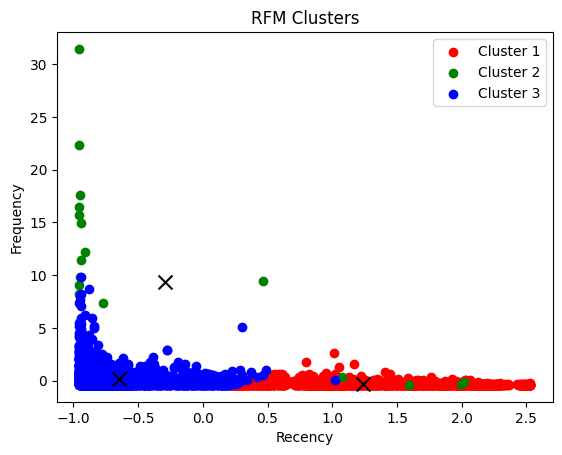

In [19]:

# colors = ['red', 'green', 'blue']
# for i in range(len(colors)):
#     print(rmf_scaler[clusters == i, 0])
#     plt.scatter(rmf_scaler[clusters == i, 0], rmf_scaler[clusters == i, 1], c=colors[i], label=f'Cluster {i+1}')

# plt.xlabel('Recency')
# plt.ylabel('Frequency')
# plt.title('RFM Clusters')
# plt.legend()
# plt.show()


colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(rmf_scaler[clusters.labels_ == i, 0], rmf_scaler[clusters.labels_ == i, 1], c=color, label=f'Cluster {i+1}')
    plt.scatter(clusters.cluster_centers_[i, 0], clusters.cluster_centers_[i, 1], marker='x', s=100, c='black')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Clusters')
plt.legend()
plt.show()


Creating the dataframe of the final values of recency of cluster 1, frequency of cluster 1 and monetary of cluster 1 respectively

In [17]:
cluster_centers = scaler.inverse_transform(clusters.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary'])
cluster_df['Cluster'] = range(1, len(cluster_df) + 1)

In [18]:
cluster_df

,Recency,Frequency,Monetary,Cluster
0,463.645650,2.569404,174.398100,1
1,140.650000,157.300000,27039.766500,2
2,64.063209,9.409959,550.414697,3


PLotting the graph for recency 

RMF Graph for Cluster 1

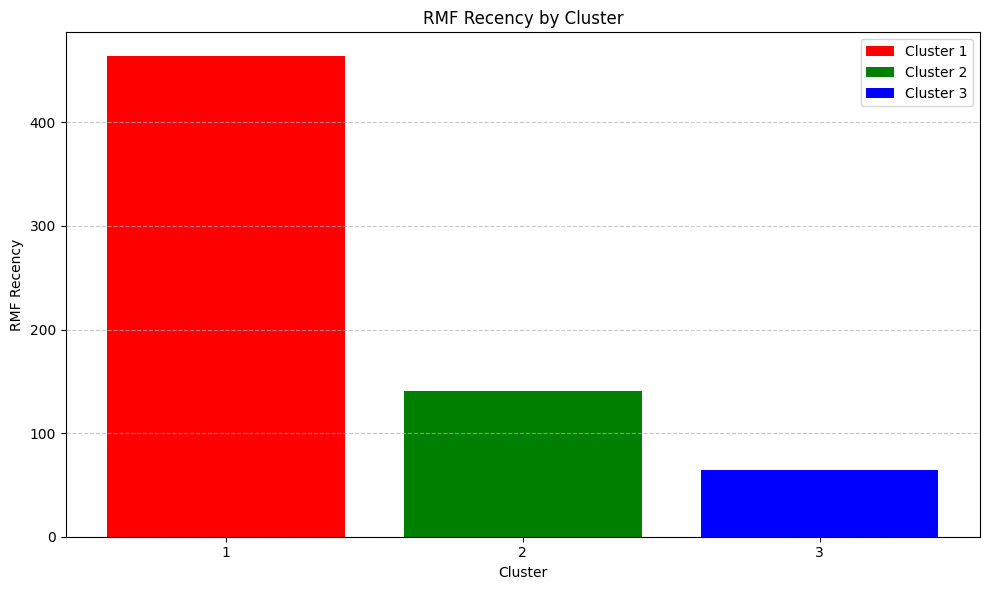

In [19]:
import matplotlib.pyplot as plt


rmf_recency = cluster_df['Recency']
clusters = cluster_df['Cluster']
colors = ['red', 'green', 'blue']


plt.figure(figsize=(10, 6))
for i, (recency, cluster) in enumerate(zip(rmf_recency, clusters)):
    plt.bar(cluster, recency, color=colors[i], label=f'Cluster {cluster}')

plt.xlabel('Cluster')
plt.ylabel('RMF Recency')
plt.title('RMF Recency by Cluster')
plt.xticks(clusters)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


RMF Graph for Cluster 2

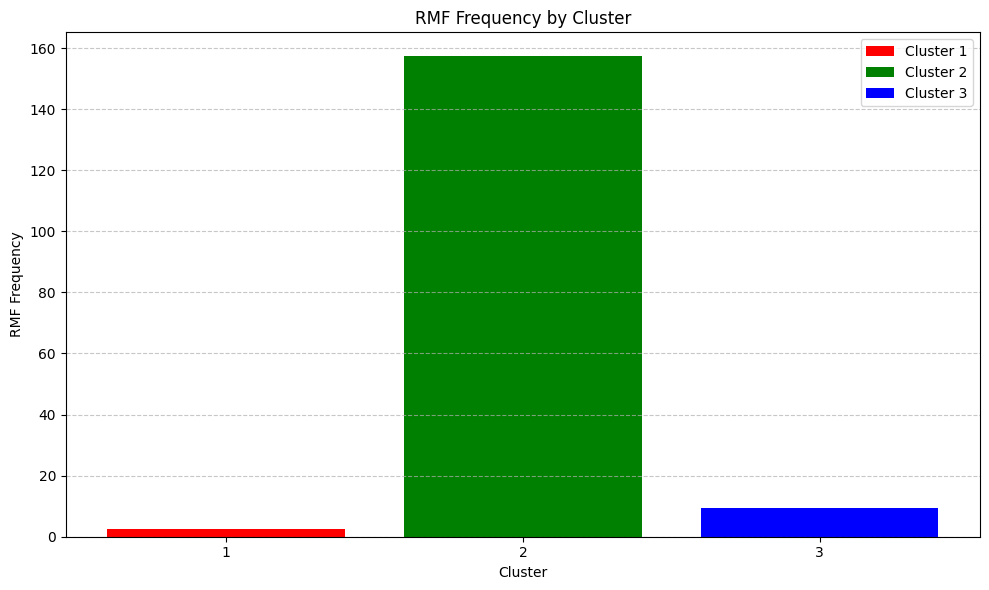

In [64]:
import matplotlib.pyplot as plt

rmf_recency = cluster_df['Frequency']
clusters = cluster_df['Cluster']
colors = ['red', 'green', 'blue']


plt.figure(figsize=(10, 6))
for i, (recency, cluster) in enumerate(zip(rmf_recency, clusters)):
    plt.bar(cluster, recency, color=colors[i], label=f'Cluster {cluster}')

plt.xlabel('Cluster')
plt.ylabel('RMF Frequency')
plt.title('RMF Frequency by Cluster')
plt.xticks(clusters)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


RMF Graph for Cluster 3

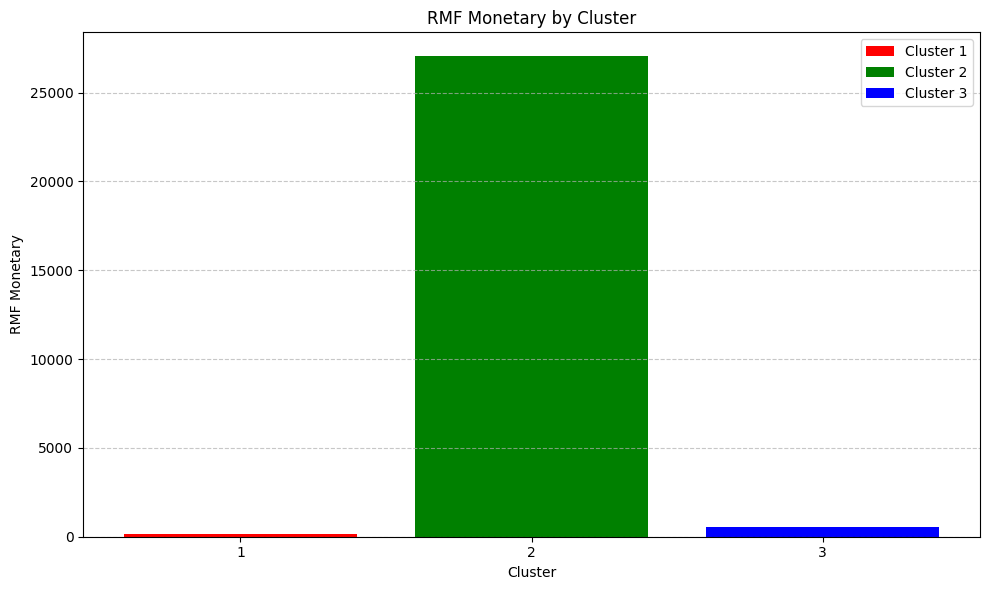

In [20]:
import matplotlib.pyplot as plt

rmf_recency = cluster_df['Monetary']
clusters = cluster_df['Cluster']
colors = ['red', 'green', 'blue']


plt.figure(figsize=(10, 6))
for i, (recency, cluster) in enumerate(zip(rmf_recency, clusters)):
    plt.bar(cluster, recency, color=colors[i], label=f'Cluster {cluster}')

plt.xlabel('Cluster')
plt.ylabel('RMF Monetary')
plt.title('RMF Monetary by Cluster')
plt.xticks(clusters)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
